# Question

Lab 1 : Simple Linear Regression

Choose any dataset and find the following:


1.   Regression Line.
2.   Plotting the Regression Line.
3.   Finding the residuals.
4.   Plotting the residuals.

Constraint: Should not use any in-built functions for Regression and Statistical parameters.


# Importing the required modules

In [23]:
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the dataset

In [24]:
#Reading the dataset.
df = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-1_Simple_Linear_Regression\Salary_Dataset.csv")

In [25]:
#Displaying the first 5 rows.
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Calculating the Regression Line

## A function to calculate the sum of an iterable

In [26]:
#Finding the sum of the values in the iterable x.
def summation(x):
  sm = 0
  for i in x:
    sm = sm + i
  return sm

## A function to calculate the average of an iterable

In [27]:
#Finding the average of the values in the iterable x.
def average(x):
  xbar = summation(x)/len(x)
  return xbar

In Simple Linear Regression we have a independent variable denoted by 'x' and a dependent variable(also known as the target variable) denoted by 'y'. Here, we approximate the extent of relationship between y and x by computing a statistical parameter called as Correlation Co-efficient.
<br>
                                                    y = mx + c
                                                    <br>
where:
m : Slope of the line : However, in statistical terms it resembles rate at which y changes w.r.t x.
c : Y-intercept of the line : The point where this regression line meets the Y-axis.


## Computing the essentials parameters

To compute 'm' and 'c', we need few essential parameters as follows:
1. Σx : Summation of x.
2. Σy : Summation of y.
3. Σx<sup>2</sup> : Summation of x<sup>2</sup>
4. Σy<sup>2</sup> : Summation of y<sup>2</sup>
5. Σxy : Summation of xy
6. $\bar{x}$ : Mean of x
7. $\bar{y}$ : Mean of y
8. N : No.of observations in the dataset.

In [28]:
X = df["YearsExperience"]
Y = df["Salary"]
N = len(X)
Xsum = summation(X)
Ysum = summation(Y)
Xbar = average(X)
Ybar = average(Y)
X2sum = summation(X*X)
Y2sum = summation(Y*Y)
XYsum = summation(X*Y)

In [29]:
print(Xsum,Ysum,Xbar,Ybar,X2sum,Y2sum,XYsum)

159.4 2280090 5.3133333333333335 76003.0 1080.5 195088658122 14321961.0


## Computing the Slope of Line

The slope was computed using the below formula:
<br>
a = $\frac{(N*\sum XY-\sum X*\sum Y)}{(N*\sum X^{2}- \sum X**2)}$

In [30]:
a = (N*XYsum - Xsum*Ysum)/(N*X2sum - Xsum**2)
a

9449.962321455077

## Computing the y-intercept of the regression line

The y-intercept was calculated using the formula:
<br>
b = $\bar{y}-a*\bar{x}$

In [31]:
b = Ybar - a*Xbar
b

25792.20019866869

# Plotting the Regression Line

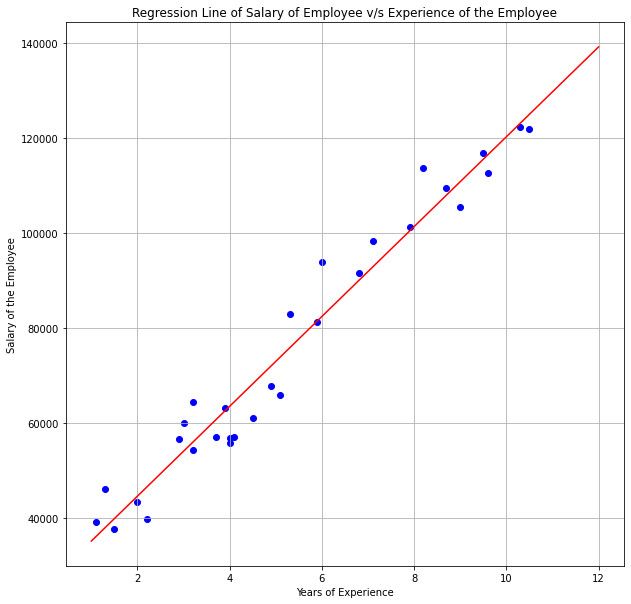

In [32]:
x = np.linspace(1,12)
y = a*x+b
plt.figure(figsize=(10,10))
for i in range(len(df)):
  plt.scatter(df['YearsExperience'][i],df['Salary'][i],c=['blue'])
plt.plot(x, y, '-r', label='y=f(x)')
plt.title('Regression Line of Salary of Employee v/s Experience of the Employee')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of the Employee')
plt.grid()
plt.show()

# Finding the residual

The residuals are computed using the given formula:
Residual Salary = Observed Salary - Predicted Salary

In [33]:
residual = df['Salary'].copy()
for i in range(len(df)):
    residual[i] = df['Salary'][i] - (a*(df['YearsExperience'][i]) + b)

In [34]:
residual

0      3155
1      8127
2     -2236
3     -1167
4     -6691
5      3444
6      6007
7     -1587
8      8412
9     -3568
10      570
11    -7798
12    -6635
13    -7456
14    -7206
15    -4159
16    -7958
17     7210
18     -183
19    11448
20     1686
21     5386
22      855
23    10530
24     1424
25    -5259
26     1402
27    -3876
28     -735
29    -3144
Name: Salary, dtype: int64

# Plotting the residuals

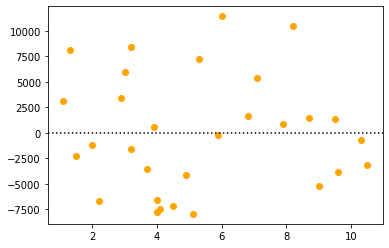

In [35]:
for i in range(len(residual)):
  plt.scatter(df['YearsExperience'][i],residual[i],c=['orange'])
plt.axhline(y = 0, color = 'k', linestyle = 'dotted')
plt.show()

In [39]:
sum(residual)

-2

In [40]:
average(residual)

-0.06666666666666667

Inferences from the Residual Plot:
- This model is a good fit owing to the following reasons:
  1. The sum of residuals is insignificant compared to the range of residuals.
  2. The mean of residuals is very close to zero.
  3. The points are dispersed throughout the model with a higher density towards y = 0 .
- The plot is slightly symmetric about y = 0 .